<a href="https://colab.research.google.com/github/gorubharath/Projects/blob/main/AEROFIT_CASE_STUDY_BY_ME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

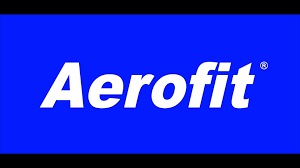

Problem statment

In [ ]:
#  create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749"
data = pd.read_csv(url)
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
data_shape = data.shape
print(f"Total_no_of_rows:{data_shape[0]}")
print(f"Total_no_of_columns:{data_shape[1]}")

Total_no_of_rows:180
Total_no_of_columns:9


In [ ]:
# Basic information about the data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
# Finding null values
pd.DataFrame({"No_of_Nulls":data.isnull().sum(),
              "Percentage_of_Nulls":data.isnull().sum()/len(data)*100})

,No_of_Nulls,Percentage_of_Nulls
Product,0,0.0
Age,0,0.0
Gender,0,0.0
Education,0,0.0
MaritalStatus,0,0.0
Usage,0,0.0
Fitness,0,0.0
Income,0,0.0
Miles,0,0.0


There are no null values

In [ ]:
# Finding no.of unique values in each column
for i in data.columns:
  print(f"{i}:{data[i].nunique()}")

Product:3
Age:32
Gender:2
Education:8
MaritalStatus:2
Usage:6
Fitness:5
Income:62
Miles:37


From the above observations ,it can be concluded that Income,Age and Miles as continues rest of others are not even though float/int consider as categorical

In [ ]:
data["Product"].value_counts()

,count
Product,
KP281,80
KP481,60
KP781,40


In [ ]:
data["Gender"].value_counts()

,count
Gender,
Male,104
Female,76


In [ ]:
data["MaritalStatus"].value_counts()

,count
MaritalStatus,
Partnered,107
Single,73


In [ ]:
data["Fitness"].value_counts()

,count
Fitness,
3,97
5,31
2,26
4,24
1,2


In [ ]:
data["Education"].value_counts()

,count
Education,
16,85
14,55
18,23
15,5
13,5
12,3
21,3
20,1


It is clear that the target column is Product,
remaining all are features

So, we have to findout the relation b/w features and Target column for that we have to convert all the categorical columns into numerical,

That would be done with the help of one hot encoding or label encoding

In [ ]:
# converting categorical to numerical
data1 = data.copy()
data["Product"].replace(["KP281","KP481","KP781"],[1,2,3],inplace = True)
data["Gender"].replace(["Male","Female"],[1,0],inplace = True)
data["MaritalStatus"].replace(["Partnered","Single"],[0,1],inplace = True)

<ipython-input-297-763cd2b8ad26>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Product"].replace(["KP281","KP481","KP781"],[1,2,3],inplace = True)
<ipython-input-297-763cd2b8ad26>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Product"].replace(["KP281","KP481","KP781"],[1,2,3],inpl

In [ ]:
#broad way of looking relation b/w the target & other features
# Internally pearson stastical hypotesis test is used
data.corr()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
Product,1.000000,0.032225,0.230653,0.495018,0.017602,0.537447,0.594883,0.624168,0.571596
Age,0.032225,1.000000,0.027544,0.280496,-0.192152,0.015064,0.061105,0.513414,0.036618
Gender,0.230653,0.027544,1.000000,0.094089,0.018836,0.214424,0.254609,0.202053,0.217869
Education,0.495018,0.280496,0.094089,1.000000,-0.068569,0.395155,0.410581,0.625827,0.307284
MaritalStatus,0.017602,-0.192152,0.018836,-0.068569,1.000000,0.007786,0.050751,-0.150293,-0.025639
Usage,0.537447,0.015064,0.214424,0.395155,0.007786,1.000000,0.668606,0.519537,0.759130
Fitness,0.594883,0.061105,0.254609,0.410581,0.050751,0.668606,1.000000,0.535005,0.785702
Income,0.624168,0.513414,0.202053,0.625827,-0.150293,0.519537,0.535005,1.000000,0.543473
Miles,0.571596,0.036618,0.217869,0.307284,-0.025639,0.759130,0.785702,0.543473,1.000000


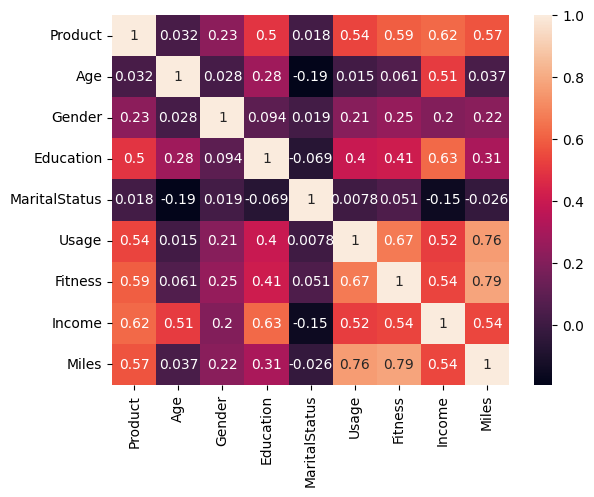

In [ ]:
sns.heatmap(data.corr(),annot=True)
plt.show()

1. Product feature is significately correlated with Mile,Income,Fitness,Usage and Education
2. Age is significantly correlated with Income
3. Education is significatly correlated with Income,Fitness
4. Usage is significantly correlated with Miles,Income and Fitness
5. Fitness correlated with Miles,Income,
6. Miles correlated with Income

In [ ]:
# categorizing the age column
bins = [17, 24, 34, 44, 50]
labels = ['18-24', '25-34', '35-44', '45-50']
data1["Age"] = pd.cut(data1["Age"],bins=bins,labels=labels)

In [ ]:
# categorizing the income column
bins = [29562, 50000, 75000, 90000, 104581]
labels = ['Low Income', 'Middle Income', 'Upper-Middle Income', 'High Income']
data1["Income"] = pd.cut(data1["Income"],bins=bins,labels=labels,include_lowest = True)

In [ ]:
# categorizing the Miles column
bins = [21, 100, 200, 300, 360]  # The ranges
labels = ['(Low)', '(Mid-Low)', '(Mid-High)', '(High)']

data1["Miles"] = pd.cut(data1["Miles"],bins=bins,labels=labels,include_lowest = True)

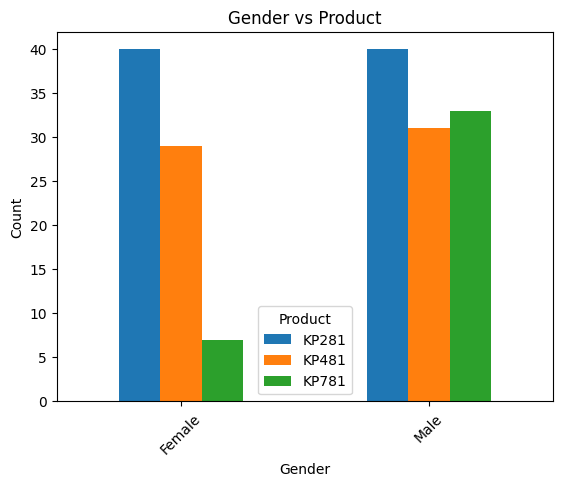

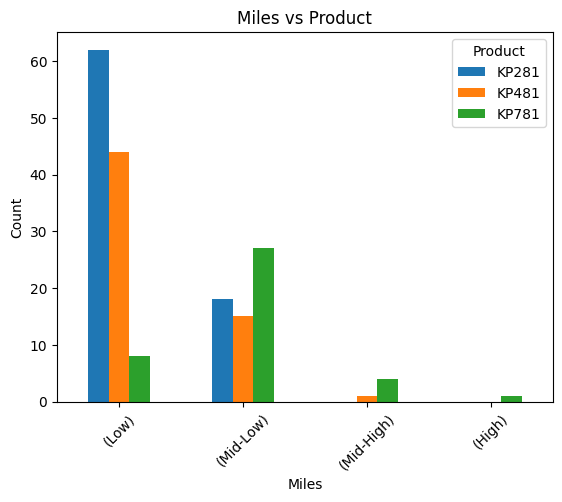

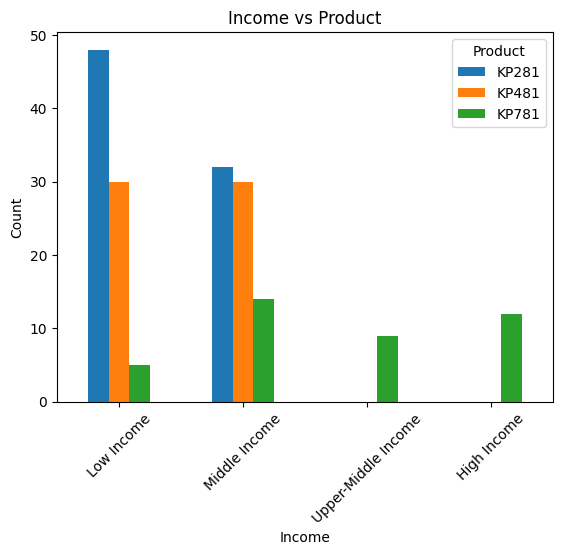

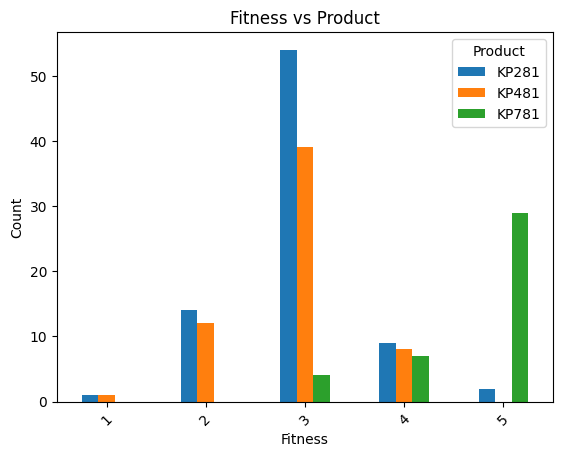

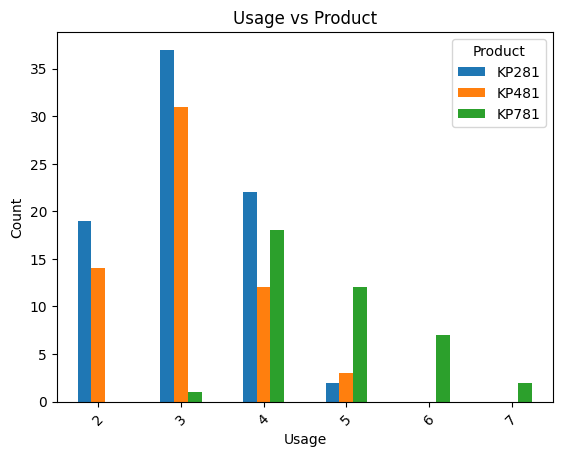

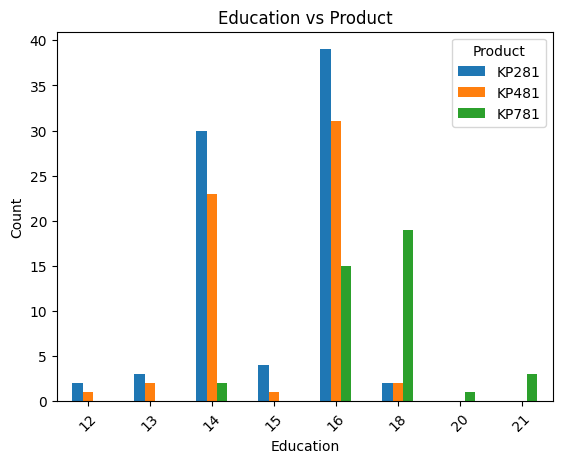

In [ ]:
col = ["Gender","Miles","Income","Fitness","Usage","Education"]
for i in col:
  product_col = pd.crosstab(data1[i],data1["Product"])
  product_col.plot(kind = "bar")
  plt.title(f"{i} vs Product")
  plt.xlabel(f"{i}")
  plt.ylabel("Count")
  plt.xticks(rotation=45)
  plt.show()

1. Female customers intrested in things which are in less price and same thing was highleted in the product vs gender plot
2. KP281, KP481 products suitable for low & mid levl miles customers
3. KP781 is for higher income peoples and KP281 and KP481 is for lower & mid range income peoples
4. KP781 is suitable for the customers whoes fitness rating 4 and 5
5. KP781 is for the pepole who have higher education,like 16,18,20,21